## Correlation matrix (Pearson)
Compute Pearson correlation for numeric columns and plot heatmap.

                       tourist_arrivals  tourism_revenue_usd  avg_stay  \
tourist_arrivals                  1.000                0.962     0.168   
tourism_revenue_usd               0.962                1.000     0.137   
avg_stay                          0.168                0.137     1.000   
avg_daily_spend                   0.532                0.546     0.281   
hotel_occupancy_rate              0.647                0.570     0.265   
exchange_rate_lkr_usd             0.008                0.081    -0.158   
tourism_employment                0.976                0.939     0.129   

                       avg_daily_spend  hotel_occupancy_rate  \
tourist_arrivals                 0.532                 0.647   
tourism_revenue_usd              0.546                 0.570   
avg_stay                         0.281                 0.265   
avg_daily_spend                  1.000                 0.749   
hotel_occupancy_rate             0.749                 1.000   
exchange_rate_lkr_usd  

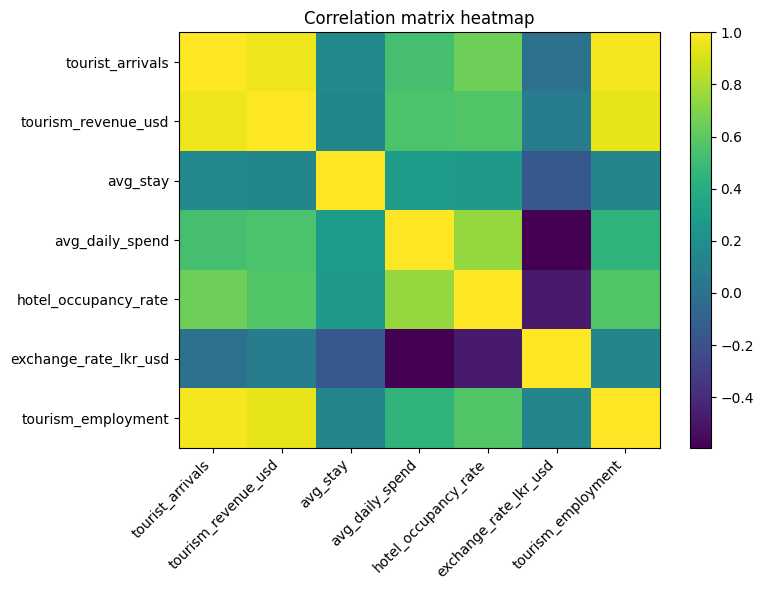

In [16]:
corr_cols = ['tourist_arrivals','tourism_revenue_usd','avg_stay','avg_daily_spend','hotel_occupancy_rate','exchange_rate_lkr_usd','tourism_employment']
corr = df[corr_cols].corr()
print(corr.round(3))

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha='right')
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title('Correlation matrix heatmap')
plt.tight_layout()
plt.show()

## Scatter: Tourist Arrivals vs Tourism Revenue
Check linear relationship visually.

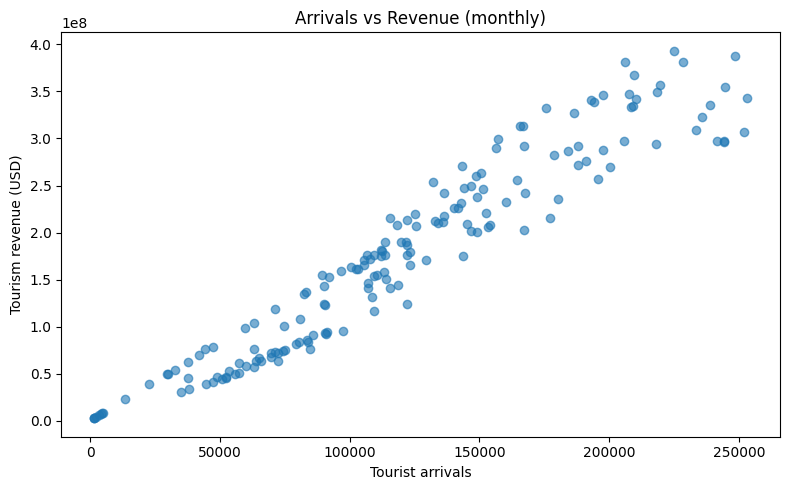

In [17]:
# Remove zeros which distort scatter
tmp = df[(df['tourist_arrivals']>0) & (df['tourism_revenue_usd']>0)].copy()
plt.figure(figsize=(8,5))
plt.scatter(tmp['tourist_arrivals'], tmp['tourism_revenue_usd'], alpha=0.6)
plt.xlabel('Tourist arrivals')
plt.ylabel('Tourism revenue (USD)')
plt.title('Arrivals vs Revenue (monthly)')
plt.tight_layout()
plt.show()

## Rolling 12-month mean: Arrivals & Revenue
Plot rolling averages to smooth short-term noise.

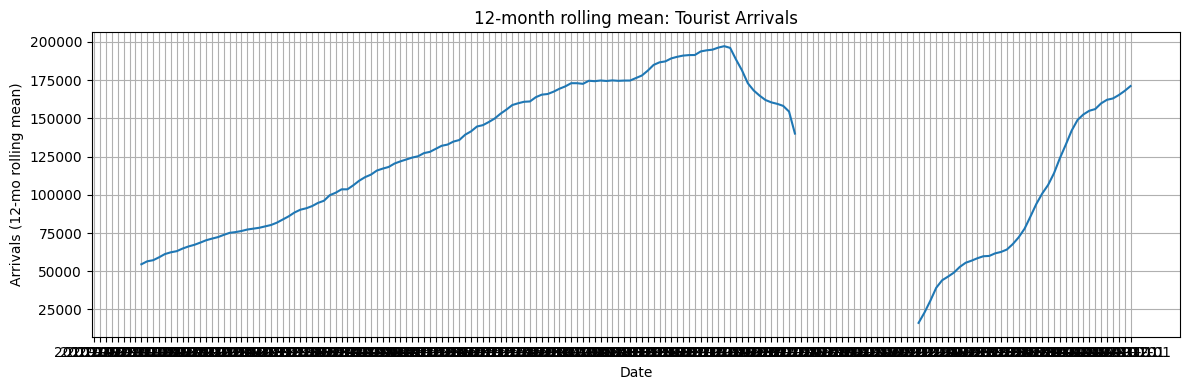

In [18]:
roll_arr = df.set_index('date')['tourist_arrivals'].replace(0, np.nan).rolling(12).mean()
plt.figure(figsize=(12,4))
plt.plot(roll_arr.index, roll_arr)
plt.title('12-month rolling mean: Tourist Arrivals')
plt.xlabel('Date')
plt.ylabel('Arrivals (12-mo rolling mean)')
plt.grid(True)
plt.tight_layout()
plt.show()

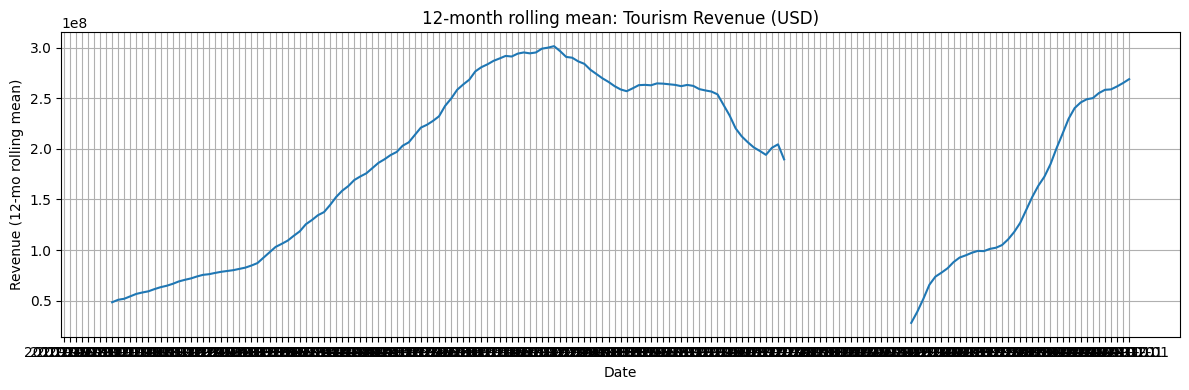

In [19]:
roll_rev = df.set_index('date')['tourism_revenue_usd'].replace(0, np.nan).rolling(12).mean()
plt.figure(figsize=(12,4))
plt.plot(roll_rev.index, roll_rev)
plt.title('12-month rolling mean: Tourism Revenue (USD)')
plt.xlabel('Date')
plt.ylabel('Revenue (12-mo rolling mean)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Seasonal decomposition (additive) of revenue
We decompose the monthly revenue series into trend, seasonal, and residual components. Each component is plotted separately for clarity.

C:\Users\nimes\AppData\Local\Temp\ipykernel_19908\2872343309.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rev_ts = df.set_index('date')['tourism_revenue_usd'].replace(0, np.nan).resample('M').sum()
C:\Users\nimes\AppData\Local\Temp\ipykernel_19908\2872343309.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rev_ts = rev_ts.asfreq('M')
C:\Users\nimes\AppData\Local\Temp\ipykernel_19908\2872343309.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rev_ts_ffill = rev_ts.fillna(method='ffill')


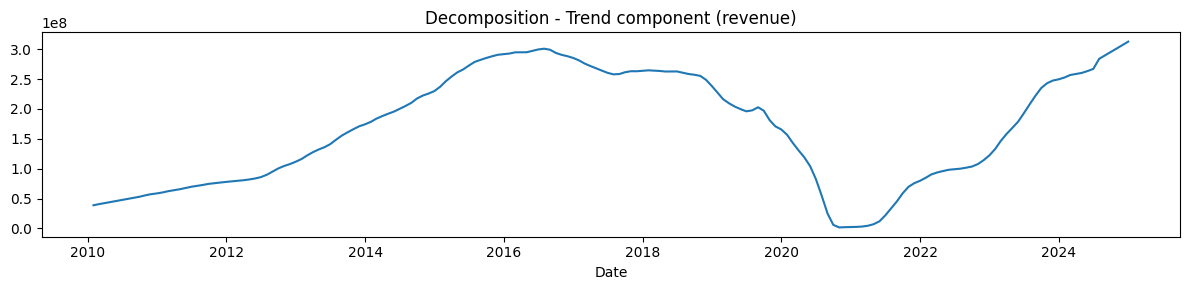

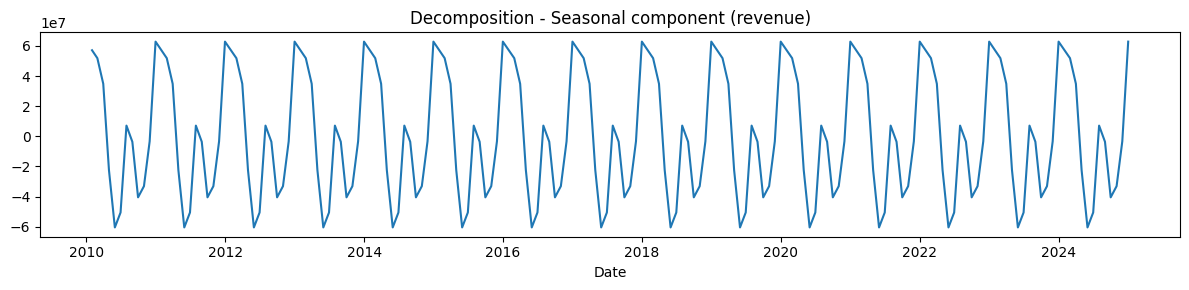

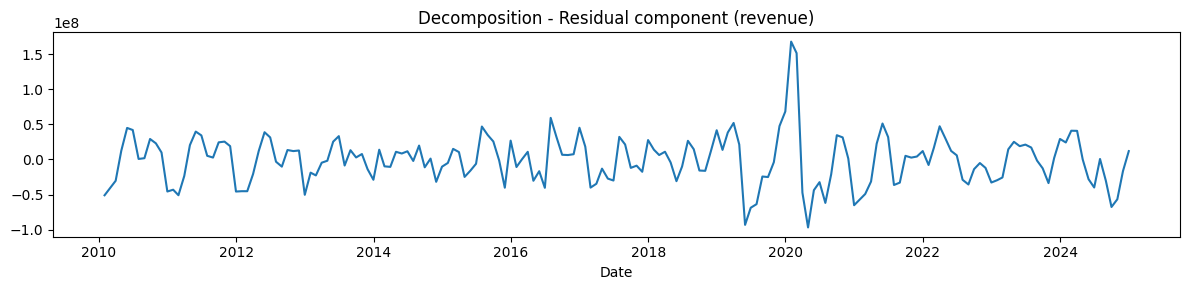

In [25]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Prepare monthly revenue series (regular frequency)
rev_ts = df.set_index('date')['tourism_revenue_usd'].replace(0, np.nan).resample('M').sum()
rev_ts = rev_ts.asfreq('M')
# Fill short gaps by forward fill for decomposition (warn: this is simplistic)
rev_ts_ffill = rev_ts.fillna(method='ffill')

res = seasonal_decompose(rev_ts_ffill, model='additive', period=12, extrapolate_trend='freq')

# Plot trend
plt.figure(figsize=(12,3))
plt.plot(res.trend.index, res.trend)
plt.title('Decomposition - Trend component (revenue)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Plot seasonal
plt.figure(figsize=(12,3))
plt.plot(res.seasonal.index, res.seasonal)
plt.title('Decomposition - Seasonal component (revenue)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(12,3))
plt.plot(res.resid.index, res.resid)
plt.title('Decomposition - Residual component (revenue)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

## Top & bottom months by arrivals and revenue

In [21]:
# Top 10 months by arrivals
top_arrivals = df.nlargest(10, 'tourist_arrivals')[['date','tourist_arrivals','tourism_revenue_usd']]
print('Top 10 months by tourist arrivals:')
display(top_arrivals)

# Bottom 10 months by arrivals (excluding zeros to show low but non-zero months)
bottom_arrivals = df[df['tourist_arrivals']>0].nsmallest(10,'tourist_arrivals')[['date','tourist_arrivals','tourism_revenue_usd']]
print('\nBottom 10 (non-zero) months by tourist arrivals:')
display(bottom_arrivals)

# Top 10 months by revenue
print('\nTop 10 months by tourism revenue:')
display(df.nlargest(10, 'tourism_revenue_usd')[['date','tourism_revenue_usd','tourist_arrivals']])

Top 10 months by tourist arrivals:


,date,tourist_arrivals,tourism_revenue_usd
107,2018-12-01,"253,169.000","342,707,786.570"
109,2019-02-01,"252,033.000","306,516,485.810"
179,2024-12-01,"248,592.000","387,414,514.940"
95,2017-12-01,"244,536.000","354,263,949.380"
110,2019-03-01,"244,328.000","296,332,726.140"
108,2019-01-01,"244,239.000","297,393,222.050"
119,2019-12-01,"241,663.000","296,895,561.980"
96,2018-01-01,"238,924.000","335,655,726.340"
97,2018-02-01,"235,618.000","322,384,799.740"
98,2018-03-01,"233,382.000","309,444,927.910"



Bottom 10 (non-zero) months by tourist arrivals:


,date,tourist_arrivals,tourism_revenue_usd
136,2021-05-01,"1,497.000","2,587,562.550"
137,2021-06-01,"1,614.000","2,781,083.450"
132,2021-01-01,"1,682.000","2,901,070.340"
138,2021-07-01,"2,429.000","4,185,169.620"
133,2021-02-01,"3,366.000","5,816,735.480"
135,2021-04-01,"4,168.000","7,205,564.960"
134,2021-03-01,"4,581.000","7,910,184.230"
139,2021-08-01,"5,040.000","8,666,308.150"
140,2021-09-01,"13,547.000","23,295,534.620"
141,2021-10-01,"22,771.000","39,199,144.560"



Top 10 months by tourism revenue:


,date,tourism_revenue_usd,tourist_arrivals
83,2016-12-01,"393,295,682.350","224,791.000"
179,2024-12-01,"387,414,514.940","248,592.000"
120,2020-01-01,"381,620,450.280","228,434.000"
71,2015-12-01,"381,293,586.420","206,114.000"
78,2016-07-01,"367,178,625.390","209,351.000"
84,2017-01-01,"356,573,409.120","219,360.000"
95,2017-12-01,"354,263,949.380","244,536.000"
169,2024-02-01,"349,566,198.400","218,350.000"
121,2020-02-01,"346,796,200.710","207,507.000"
73,2016-02-01,"346,738,791.330","197,697.000"


## Outlier detection (Z-score) for tourist arrivals
Flag months where arrivals are extreme (|z| > 3).

In [22]:
arrivals = df['tourist_arrivals'].replace(0, np.nan)
z_scores = np.abs(stats.zscore(arrivals.dropna()))
# align index
z_idx = arrivals.dropna().index
outlier_idx = z_idx[z_scores > 3]
print('Outlier months (|z|>3) for arrivals:')
display(df.loc[df.index.isin(outlier_idx), ['date','tourist_arrivals','tourism_revenue_usd']])

Outlier months (|z|>3) for arrivals:


,date,tourist_arrivals,tourism_revenue_usd


## Save cleaned & derived dataset
We save a copy with derived variables for downstream notebooks.

In [23]:
out_path = Path('../data/tourism_explored.csv')
df.to_csv(out_path, index=False)
print('Saved explored dataset to', out_path)

Saved explored dataset to ..\data\tourism_explored.csv


## Summary of key findings (from EDA)

- The dataset spans 2010–2024 with monthly observations.  
- Structural zeros occur in 2020 (pandemic) and should be treated separately in modeling.  
- Tourist arrivals and revenue show clear seasonality (inspect monthly means above).  
- A strong positive correlation exists between arrivals and revenue (scatterplot & Pearson correlation).  
- Rolling averages and decomposition show recovery patterns after shocks with notable volatility.  

**Next steps:** use `statistical_methods.ipynb` to define samples and hypothesis tests, and `predictions.ipynb` for forecasting using the cleaned series.